### Final Project - OKcupid

---
### Members:

- Liron Ohana

- Maayan Elkarif

- Tovi Segal
___

### Our Link:

https://www.kaggle.com/andrewmvd/okcupid-profiles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import collections as c
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
%matplotlib inline

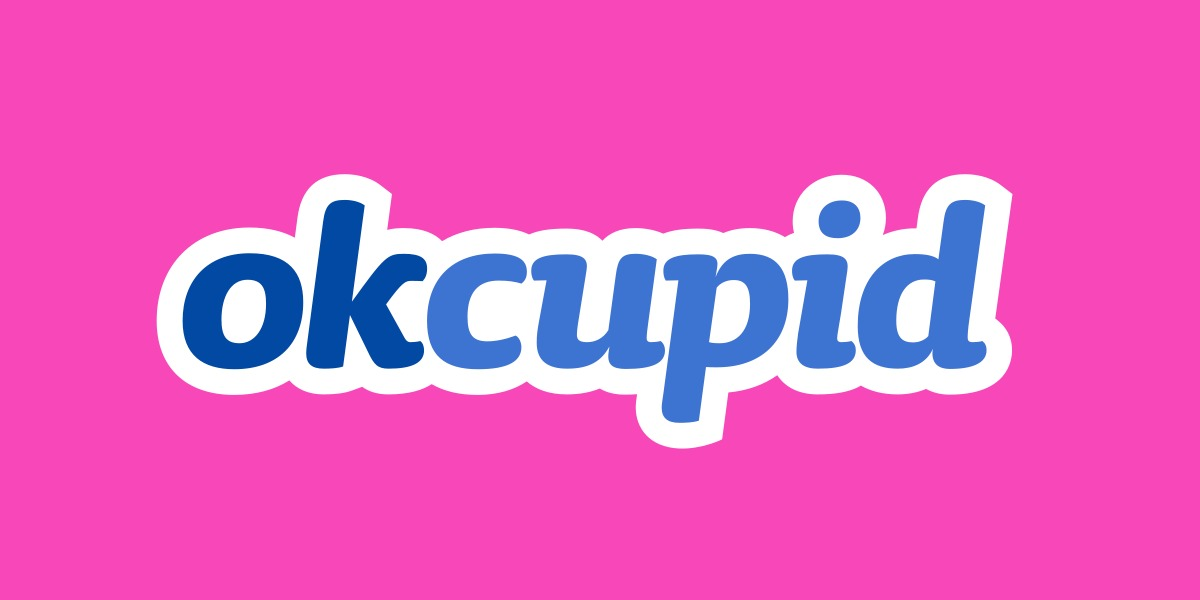

1. [Introduction](#section1)  
2. [OBSERVATION 1](#section2)
3. [OBSERVATION 2](#section3)
4. [OBSERVATION 3](#section4)

## Introduction

OKCUPID is a data file that contains a variety of information about different people that looking for a relationship.


In [3]:
url= "https://raw.githubusercontent.com/LironOhana/Final_Project/main/okcupid_profiles546546.csv"
okcupid_df = pd.read_csv(url) 
okcupid_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
okcupid_df.isnull().sum()

age               0
status            0
sex               0
orientation       0
body_type       934
diet           4112
drinks          548
drugs          2491
education      1159
ethnicity      1038
height            0
income            0
job            1468
last_online       0
location          0
offspring      6176
pets           3434
religion       3569
sign           1903
smokes         1000
speaks            7
essay0          937
essay1         1273
essay2         1605
essay3         1991
essay4         1783
essay5         1850
essay6         2376
essay7         2149
essay8         3437
essay9         2150
dtype: int64

At this point we decided not to fill any missing values. For each insight separately we will address the relevant column.

In [5]:
okcupid_df.columns = okcupid_df.columns.str.replace(' ', '')

<AxesSubplot:>

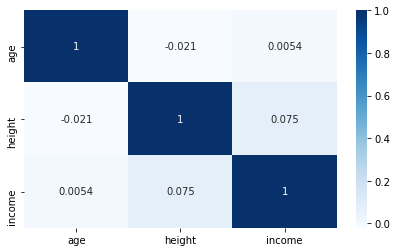

In [6]:
plt.figure(figsize=(7,4)) 
sns.heatmap(okcupid_df.corr(),annot=True,cmap='Blues')

We tried to find a correlation between the different columns in the file. We found that the connection is very weak, and there is almost no correlation, so we started researching certain columns regardless of the correlation.


# OBSERVATION 1


In [7]:
edu_lst = ['dropped out of law school' , 'graduated from law school' , 'dropped out of ph.d program' , 'graduated from ph.d program']
new_edu = okcupid_df[okcupid_df.education.isin(edu_lst)]
# new_edu["drugs"] = new_edu.drugs.dropna()
new_edu.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
65,29,single,m,straight,fit,mostly vegetarian,socially,never,graduated from ph.d program,white,...,i really like meeting new people. small-world ...,"i'm a scientist of sorts, doing some interesti...","talking, if you get me on the right subject. e...",i am a coffee nerd. ojal que llueva caf! loc...,food: i'm not a strict vegetarian but i don't ...,"wikipedia coffee bread, bagels, and the other ...",i think last names are interesting. lately i'...,"baking challah, then usually out with friends....",i watch sytycd.,you want to - check out a food pop-up - introd...
73,31,single,f,straight,curvy,mostly anything,socially,never,graduated from law school,indian,...,i'm an easy-going person with a genuine apprec...,"writing, performing/composing music, watching ...","whistling, writing, doing three-point turns, c...","well, that depends more on you than on me. wha...",books - some recently appreciated ones are: is...,"water, dairy products, a sense of community, a...",ways to amuse myself and others.,"getting a fabulous dinner, chilling at a mello...",ask and i'll tell you pretty much anything.,- you are looking for a long-term relationship...
108,28,single,f,straight,NaN,NaN,socially,never,graduated from law school,pacific islander,...,i pride myself on having fun no matter where i...,i'm a practicing attorney who is trying to fin...,finding answers. baking! storytelling. cheerin...,my laugh...i'm pretty loud.,books: anything from really trashy chick lit t...,soap. brunch. my kindle. peanut butter. music....,planning my next trip to somewhere. whether it...,NaN,i'm terrified of dating websites.,you're looking for someone to laugh with.
114,36,seeing someone,m,straight,fit,strictly anything,often,sometimes,graduated from ph.d program,white,...,"a business owner, a backend/frontend developer...",recovering from one hell of a month in africa....,"- breaking things, then trying to fix them all...",i have on shoes.,"- if you like ""who's afraid of virginia wolf"",...",after spending 3 months with no couch ... i kn...,how to play the banjo better. how to blend bet...,i have a knack for watching an entire tv serie...,"tyler, the creator makes me wanna move.",can type a bit of english. and would like to m...
157,29,single,f,straight,average,vegetarian,socially,never,graduated from law school,white,...,i grew up on the east coast and moved to the b...,working at a non-profit that focuses on enviro...,scrabble the tuesday crossword in the nytimes ...,i'm not going to say it's my eyes; that sounds...,"books: east of eden, to kill a mockingbird, mo...",laughter,"politics, current events, how to get out of th...","dinner party with friends, out at bar with my ...","if i could date a fictional character, it'd be...",NaN


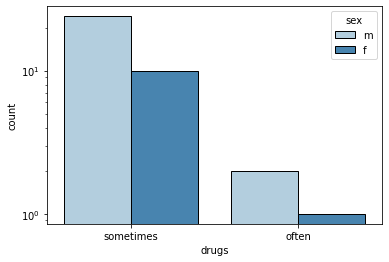

In [8]:
drug_without_never = new_edu[new_edu.drugs.isin(['sometimes' , 'often'])]
sns.countplot(x=drug_without_never['drugs'] , hue =drug_without_never['sex'] , edgecolor = 'black', palette='Blues').set_yscale("log")

We can see from the above graph that men who smoke drugs - will constitute more than the women in the population.

In [9]:
new_edu['drugs'] = new_edu['drugs'].astype('category').cat.codes
new_edu.head()

<ipython-input-9-308c270db196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_edu['drugs'] = new_edu['drugs'].astype('category').cat.codes


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
65,29,single,m,straight,fit,mostly vegetarian,socially,0,graduated from ph.d program,white,...,i really like meeting new people. small-world ...,"i'm a scientist of sorts, doing some interesti...","talking, if you get me on the right subject. e...",i am a coffee nerd. ojal que llueva caf! loc...,food: i'm not a strict vegetarian but i don't ...,"wikipedia coffee bread, bagels, and the other ...",i think last names are interesting. lately i'...,"baking challah, then usually out with friends....",i watch sytycd.,you want to - check out a food pop-up - introd...
73,31,single,f,straight,curvy,mostly anything,socially,0,graduated from law school,indian,...,i'm an easy-going person with a genuine apprec...,"writing, performing/composing music, watching ...","whistling, writing, doing three-point turns, c...","well, that depends more on you than on me. wha...",books - some recently appreciated ones are: is...,"water, dairy products, a sense of community, a...",ways to amuse myself and others.,"getting a fabulous dinner, chilling at a mello...",ask and i'll tell you pretty much anything.,- you are looking for a long-term relationship...
108,28,single,f,straight,NaN,NaN,socially,0,graduated from law school,pacific islander,...,i pride myself on having fun no matter where i...,i'm a practicing attorney who is trying to fin...,finding answers. baking! storytelling. cheerin...,my laugh...i'm pretty loud.,books: anything from really trashy chick lit t...,soap. brunch. my kindle. peanut butter. music....,planning my next trip to somewhere. whether it...,NaN,i'm terrified of dating websites.,you're looking for someone to laugh with.
114,36,seeing someone,m,straight,fit,strictly anything,often,2,graduated from ph.d program,white,...,"a business owner, a backend/frontend developer...",recovering from one hell of a month in africa....,"- breaking things, then trying to fix them all...",i have on shoes.,"- if you like ""who's afraid of virginia wolf"",...",after spending 3 months with no couch ... i kn...,how to play the banjo better. how to blend bet...,i have a knack for watching an entire tv serie...,"tyler, the creator makes me wanna move.",can type a bit of english. and would like to m...
157,29,single,f,straight,average,vegetarian,socially,0,graduated from law school,white,...,i grew up on the east coast and moved to the b...,working at a non-profit that focuses on enviro...,scrabble the tuesday crossword in the nytimes ...,i'm not going to say it's my eyes; that sounds...,"books: east of eden, to kill a mockingbird, mo...",laughter,"politics, current events, how to get out of th...","dinner party with friends, out at bar with my ...","if i could date a fictional character, it'd be...",NaN


The numbers of the drugs columns:
-1 - `NaN` ,
0 - `never` ,
1 - `often` ,
2 - `sometimes`

(array([0, 1, 2, 3]),
 [Text(0, 0, 'graduated from ph.d program'),
  Text(1, 0, 'graduated from law school'),
  Text(2, 0, 'dropped out of ph.d program'),
  Text(3, 0, 'dropped out of law school')])

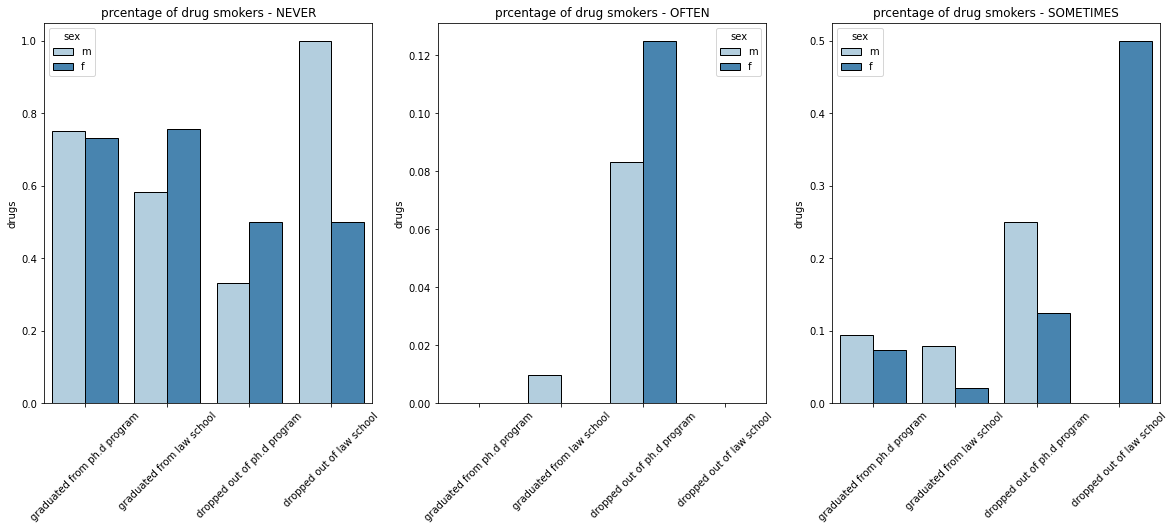

In [10]:
plt.figure(1,figsize=(20,7))
plt.subplot(1,3,1)

plt.title("prcentage of drug smokers - NEVER")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==0 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

plt.subplot(1,3,2)
plt.title("prcentage of drug smokers - OFTEN")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==1 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
plt.title("prcentage of drug smokers - SOMETIMES")
sns.barplot(x= new_edu["education"], y= new_edu["drugs"]==2 ,hue = new_edu['sex'] , ci = None , edgecolor = 'black', palette='Blues')#.set_yscale("log")
plt.xlabel("")
plt.xticks(rotation=45)

#plt.show()

The graphs above show the cross-section of four groups from the education column, in relation to drug use (all data in percent).

## conclusion:

Men who dropped out of law school  - have never tried drugs in their lives.

# OBSERVATION 2

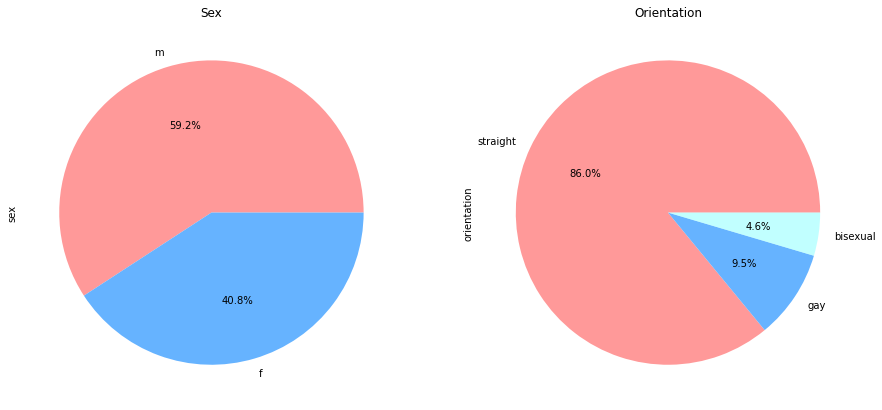

In [11]:
plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Sex")
colors = ['#ff9999','#66b3ff','#99ffff99','#ffcc99']
sex_data = okcupid_df["sex"].value_counts().plot.pie(autopct="%1.1f%%" , colors = colors)
plt.subplot(1,2,2)
plt.title("Orientation")
colors = ['#ff9999','#66b3ff','#99ffff99','#ffcc99']
sex_data = okcupid_df["orientation"].value_counts().plot.pie(autopct="%1.1f%%", colors = colors)


In the above graphs we can see the division between men and women, and their sexual orientation.

In [12]:
okcupid_df3 = okcupid_df.copy()
okcupid_df3["income"]=okcupid_df3["income"].fillna(0).copy()
okcupid_df3.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In the `income` column we deal with the missing values by replacing them with the digit zero.

In [13]:
ori_count = okcupid_df3.groupby('orientation').count()['age']
ori_count

orientation
bisexual     476
gay          984
straight    8937
Name: age, dtype: int64

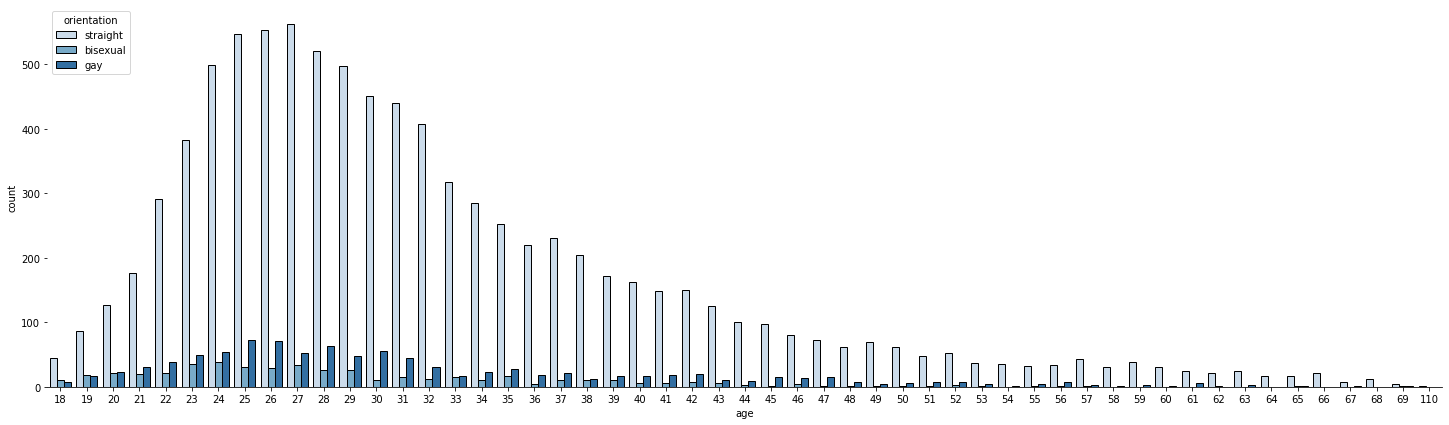

In [17]:
plt.rcParams["figure.figsize"] = (25,7)
sns.countplot(x ="age", hue = 'orientation', data = okcupid_df3,edgecolor = 'black', palette='Blues')
sns.despine(left=True)

Because the age and income distribution is very large, we created age and income cuts so we can research better.

In [18]:
okcupid_df3['ori_percentage']=0

In [19]:
okcupid_df3.loc[okcupid_df3['orientation']=='straight','ori_percentage']=1/ori_count.straight
okcupid_df3.loc[okcupid_df3['orientation']=='gay','ori_percentage']=1/ori_count.gay
okcupid_df3.loc[okcupid_df3['orientation']=='bisexual','ori_percentage']=1/ori_count.bisexual

In [20]:
income_groups = pd.cut(okcupid_df3["income"], bins = [20000, 50000, 80000, 110000, 140000, np.inf])
age_groups18_30 = pd.cut(okcupid_df3["age"], bins = [18, 30])
df_18_30 = okcupid_df3.groupby([age_groups18_30,income_groups,'orientation'])[['ori_percentage']].sum()
df_18_30 = df_18_30.rename(columns = {"orientation" : "ori_percentage"})
df_18_30 = pd.DataFrame(df_18_30.to_records())

In [21]:
age_groups30_40 = pd.cut(okcupid_df3["age"], bins = [30, 40])
df_30_40 = okcupid_df3.groupby([age_groups30_40,income_groups,'orientation'])[['ori_percentage']].sum()
df_30_40 = df_30_40.rename(columns = {"orientation" : "ori_percentage"})
df_30_40 = pd.DataFrame(df_30_40.to_records())

In [22]:
age_groups40_50 = pd.cut(okcupid_df["age"], bins = [40, 50])
df_40_50 = okcupid_df3.groupby([age_groups40_50,income_groups,'orientation'])[['ori_percentage']].sum()
df_40_50 = df_40_50.rename(columns = {"orientation" : "ori_percentage"})
df_40_50 = pd.DataFrame(df_40_50.to_records())

In [23]:
age_groups50_60 = pd.cut(okcupid_df["age"], bins = [50, 60])
df_50_60 = okcupid_df3.groupby([age_groups50_60,income_groups,'orientation'])[['ori_percentage']].sum()
df_50_60 = df_50_60.rename(columns = {"orientation" : "ori_percentage"})
df_50_60 = pd.DataFrame(df_50_60.to_records())

In [24]:
age_groups60_inf = pd.cut(okcupid_df["age"], bins = [60, np.inf])
df_60_inf = okcupid_df3.groupby([age_groups60_inf,income_groups,'orientation'])[['ori_percentage']].sum()
df_60_inf = df_60_inf.rename(columns = {"orientation" : "ori_percentage"})
df_60_inf = pd.DataFrame(df_60_inf.to_records())

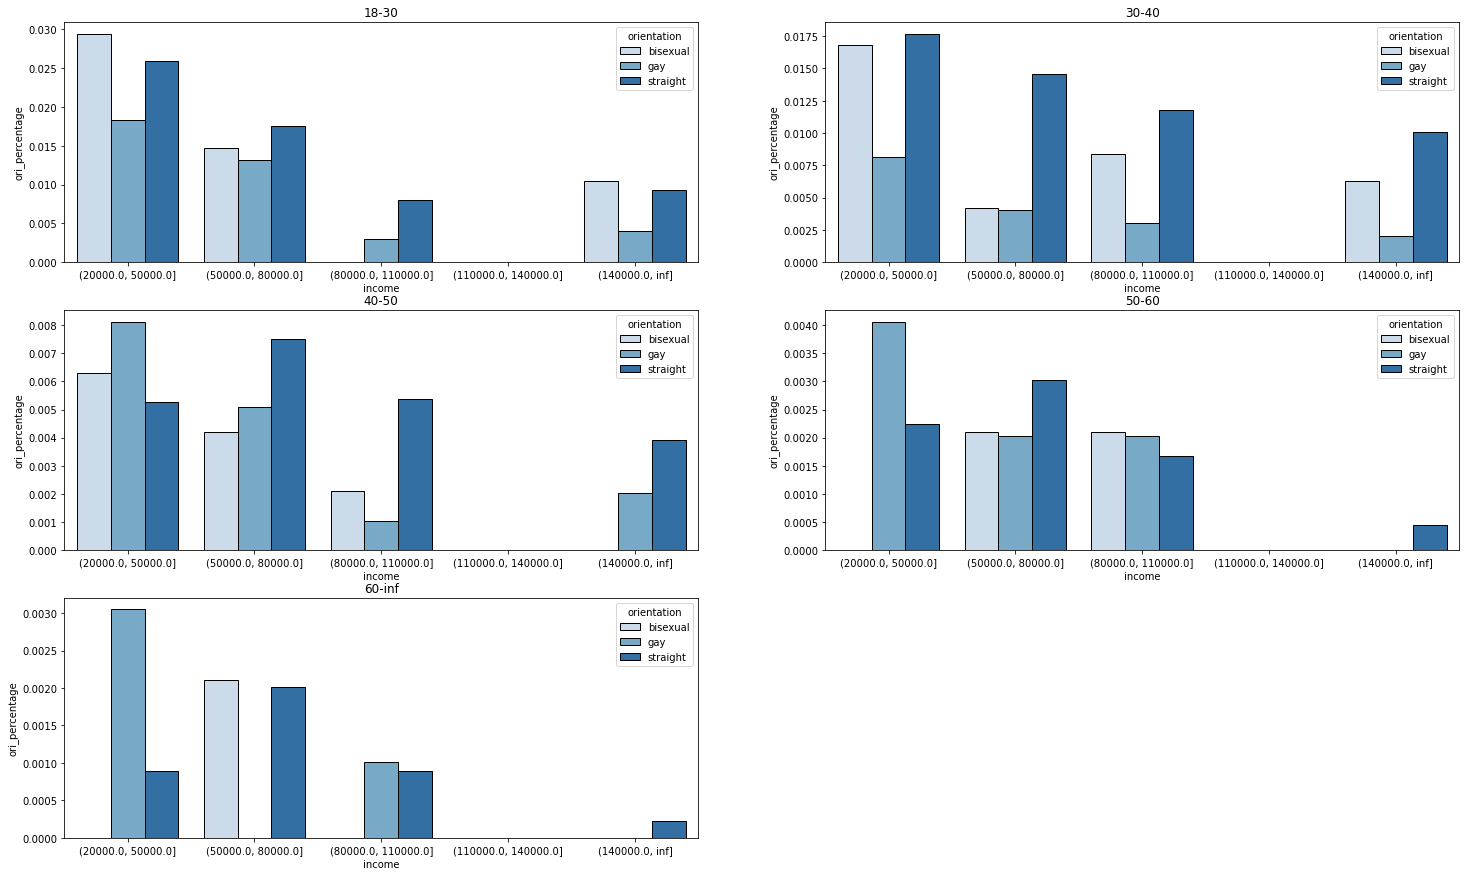

In [25]:
plt.figure(1,figsize=(25,15))

# fig, axes = plt.subplots(3,2,figsize=(22,10))
plt.subplot(3,2,1)
plt.title("18-30")
sns.barplot(x = df_18_30["income"], y = df_18_30["ori_percentage"], hue=(df_18_30["orientation"]),edgecolor = 'black', palette='Blues' ,ci=None)#.set_yscale("log")

plt.subplot(3,2,2)
plt.title("30-40")
sns.barplot(x = df_30_40["income"], y = df_30_40["ori_percentage"], hue=(df_30_40["orientation"]),edgecolor = 'black', palette='Blues' ,ci=None)#.set_yscale("log")

plt.subplot(3,2,3)
plt.title("40-50")
sns.barplot(x = df_40_50["income"], y = df_40_50["ori_percentage"], hue=(df_40_50["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.subplot(3,2,4)
plt.title("50-60")
sns.barplot(x = df_50_60["income"], y = df_50_60["ori_percentage"], hue=(df_50_60["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.subplot(3,2,5)
plt.title("60-inf")
sns.barplot(x = df_60_inf["income"], y = df_60_inf["ori_percentage"], hue=(df_60_inf["orientation"]),edgecolor = 'black', palette='Blues', ci=None)#.set_yscale("log")

plt.show()

### conclusion:
we can see:
1. from the graphs in the 30-40 age range - straights earn more than gays and bisexuals in all salary ranges.
2. we can see that if you look at all the graphs on the salary range of 20,000-50,000 - gays and bisexuals actually earn more, (except for the age group 30-40, which has a small gap in favor of straights).


 # OBSERVATION 3

In [26]:
okcupid_df4 = okcupid_df.copy()
columns=["body_type","essay0","essay3","essay9"]
okcupid_df4[columns]=okcupid_df4[columns].fillna("No info")
okcupid_df4.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,No info,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,No info
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,No info


we would like to see if there is a connection between external appearances and the level of desire and seriousness of each user to find true love according to parts that each user entered on himself.
We will create a new column, and in this column we will combine all the columns that the users entered according to the registration requirements and we will explore this column.

After arranging the columns we created a new column and in this column, we counted the number of words that each user wrote in the description about himself.

Then we will focus on the `body type` column.

In [27]:
okcupid_df4["profile text"] = (okcupid_df4["essay0"].str.cat(okcupid_df4.iloc[:,22:-1].astype(str), sep=" "))
okcupid_df4["total words"]=okcupid_df4["profile text"].str.split().str.len()

In [28]:
df_num_word=(okcupid_df4.groupby(["body_type", "sex"])[["total words"]].count())
df_num_word = pd.DataFrame(df_num_word.to_records())
# df_num_word

Text(0.5, 1.0, 'Total Words')

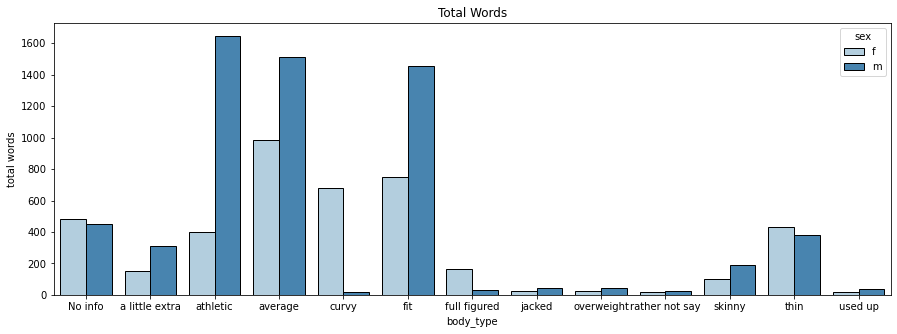

In [25]:
sns.barplot(x = df_num_word["body_type"], y=df_num_word["total words"], hue=df_num_word["sex"],edgecolor = 'black', palette='Blues' ,ci=None)
plt.title("Total Words")

In this diagram, we can see that people with body type: `athletic` , `average` , `fit`, give much more details than the others. 

In [26]:
the_word_my=okcupid_df4[okcupid_df4["profile text"].str.contains("my")]

df_my=(the_word_my.groupby(["body_type", "sex"])[["sex"]].count())
df_my=df_my.rename(columns= {"sex":"count"})
df_my =pd.DataFrame(df_my.to_records())
# df_my

Text(0.5, 1.0, 'Count The Word "My"')

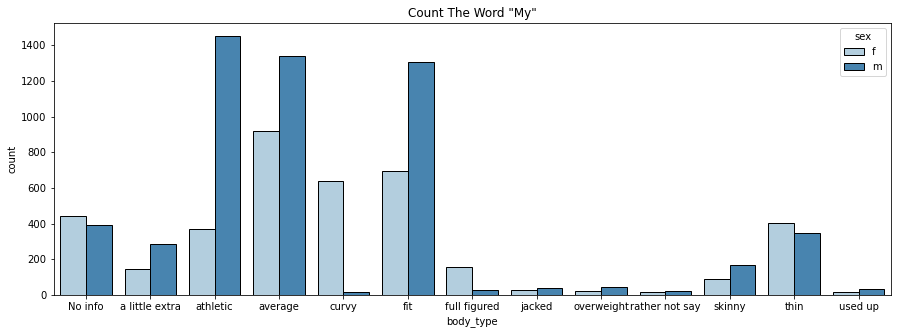

In [27]:
sns.barplot (x = df_my["body_type"], y=df_my["count"], hue=df_my["sex"],edgecolor = 'black', palette='Blues' ,ci=None)
plt.title('Count The Word "My"')

In this diagram, we can see that the men talk much more about themselves than the women.

In [28]:
love=okcupid_df[okcupid_df4["profile text"].str.contains("looking for love") | okcupid_df4["profile text"].str.contains("relationship") | okcupid_df4["profile text"].str.contains("serious")
        | okcupid_df4["profile text"].str.contains("marriage")
        | okcupid_df4["profile text"].str.contains("ready")
        | okcupid_df4["profile text"].str.contains("long term")
        | okcupid_df4["profile text"].str.contains("romantic")
        | okcupid_df4["profile text"].str.contains("romance")
        | okcupid_df4["profile text"].str.contains("know you")
        | okcupid_df4["profile text"].str.contains("partner")
        | okcupid_df4["profile text"].str.contains("sex")==False]


df_l=love.groupby(["body_type","sex"])[['sex']].count()
# df_l=love[["body_type","sex"]]
df_l=df_l.rename(columns= {"sex":"count"})
df_l = pd.DataFrame(df_l.to_records())
# df_l

Text(0.5, 1.0, 'Looking For Serious Love')

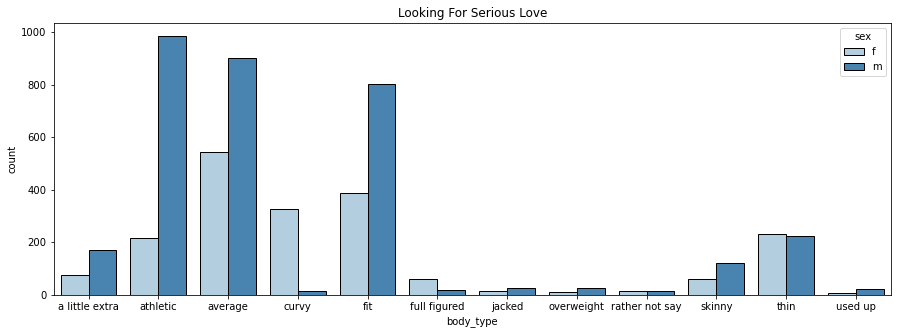

In [29]:
sns.barplot (x = df_l["body_type"], y=df_l["count"],edgecolor = 'black', palette='Blues' ,hue=df_l["sex"] ,ci=None)
plt.title("Looking For Serious Love")

### conclusion:
1. From all the mentioned above, it seems that people that looks good gives more details about themselves and therefore they with more confident.
   So they have a higher chance to find love. 


2. Another option is that because there is a stigma about people who look good that they are shallow people without depth, so they are afraid they will not have a chance to really find love in the app. So when they elaborate more on the profile they come to prove they really want something serious and not something transient.
